# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'q=' + city.replace(' ','+') + '&units=imperial' + '&APPID=' + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | marystown
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | anloga
Processing Record 8 of Set 1 | leningradskiy
Processing Record 9 of Set 1 | palmer
Processing Record 10 of Set 1 | faya
Processing Record 11 of Set 1 | tautira
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | lae
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | atasu
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | varhaug
Processing Record 18 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | quang ngai
Processing Record 23 of Set 1 | mayo
P

City not found. Skipping...
Processing Record 39 of Set 4 | fortuna
Processing Record 40 of Set 4 | padang
Processing Record 41 of Set 4 | liaocheng
Processing Record 42 of Set 4 | guerrero negro
Processing Record 43 of Set 4 | sinop
Processing Record 44 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 4 | camacha
Processing Record 46 of Set 4 | lorengau
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | suez
Processing Record 0 of Set 5 | mecca
Processing Record 1 of Set 5 | pinega
Processing Record 2 of Set 5 | torbay
Processing Record 3 of Set 5 | san policarpo
Processing Record 4 of Set 5 | luwuk
Processing Record 5 of Set 5 | springbok
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | klaksvik
Processing Record 8 of Set 5 | hambantota
Processing Record 9 of Set 5 | montepuez
Processing Record 10 of Set 5 | rio grande
Processing Record 11 of Set 5 | la ronge
Proce

Processing Record 36 of Set 8 | kostomuksha
Processing Record 37 of Set 8 | husavik
Processing Record 38 of Set 8 | mae sai
Processing Record 39 of Set 8 | strezhevoy
Processing Record 40 of Set 8 | noumea
Processing Record 41 of Set 8 | ovsyanka
Processing Record 42 of Set 8 | sambava
Processing Record 43 of Set 8 | longyearbyen
Processing Record 44 of Set 8 | jitauna
Processing Record 45 of Set 8 | kuybyshevo
Processing Record 46 of Set 8 | lisakovsk
Processing Record 47 of Set 8 | el jicaro
Processing Record 48 of Set 8 | palu
Processing Record 49 of Set 8 | oranjemund
Processing Record 0 of Set 9 | jiddah
City not found. Skipping...
Processing Record 1 of Set 9 | brae
Processing Record 2 of Set 9 | the pas
Processing Record 3 of Set 9 | sangar
Processing Record 4 of Set 9 | milledgeville
Processing Record 5 of Set 9 | mayya
Processing Record 6 of Set 9 | hare bay
Processing Record 7 of Set 9 | nouadhibou
Processing Record 8 of Set 9 | plainview
Processing Record 9 of Set 9 | erenho

Processing Record 19 of Set 12 | bud
Processing Record 20 of Set 12 | makaha
Processing Record 21 of Set 12 | rudnogorsk
Processing Record 22 of Set 12 | margate
Processing Record 23 of Set 12 | dwarka
Processing Record 24 of Set 12 | paita
Processing Record 25 of Set 12 | tazovskiy
Processing Record 26 of Set 12 | milingimbi
City not found. Skipping...
Processing Record 27 of Set 12 | maragogi
Processing Record 28 of Set 12 | lyuban
Processing Record 29 of Set 12 | burnie
Processing Record 30 of Set 12 | barahona
Processing Record 31 of Set 12 | yunjinghong
City not found. Skipping...
Processing Record 32 of Set 12 | maningrida
Processing Record 33 of Set 12 | ahuimanu
Processing Record 34 of Set 12 | jiangyou
Processing Record 35 of Set 12 | marzuq
Processing Record 36 of Set 12 | muncar
Processing Record 37 of Set 12 | laguna
Processing Record 38 of Set 12 | hamilton
Processing Record 39 of Set 12 | babanusah
City not found. Skipping...
Processing Record 40 of Set 12 | saint-augusti

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,61.18,89,14,13.76,ZA,1681411412
1,jamestown,42.0970,-79.2353,81.52,29,0,12.66,US,1681411386
2,kapaa,22.0752,-159.3190,77.09,83,75,13.80,US,1681411413
3,marystown,47.1666,-55.1483,45.86,100,69,7.00,CA,1681411413
4,vaini,-21.2000,-175.2000,77.16,88,40,6.91,TO,1681411413


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,61.18,89,14,13.76,ZA,1681411412
1,jamestown,42.0970,-79.2353,81.52,29,0,12.66,US,1681411386
2,kapaa,22.0752,-159.3190,77.09,83,75,13.80,US,1681411413
3,marystown,47.1666,-55.1483,45.86,100,69,7.00,CA,1681411413
4,vaini,-21.2000,-175.2000,77.16,88,40,6.91,TO,1681411413


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

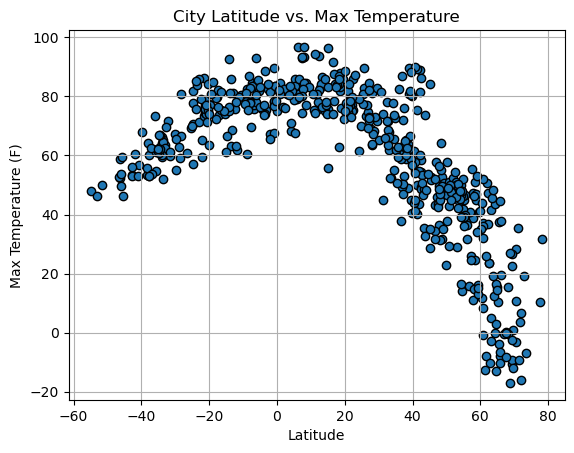

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

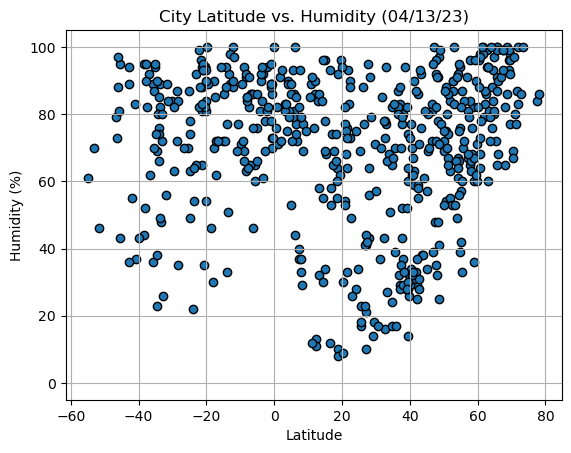

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

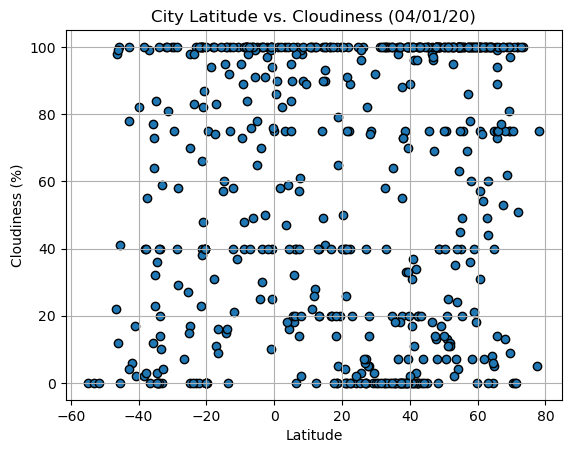

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

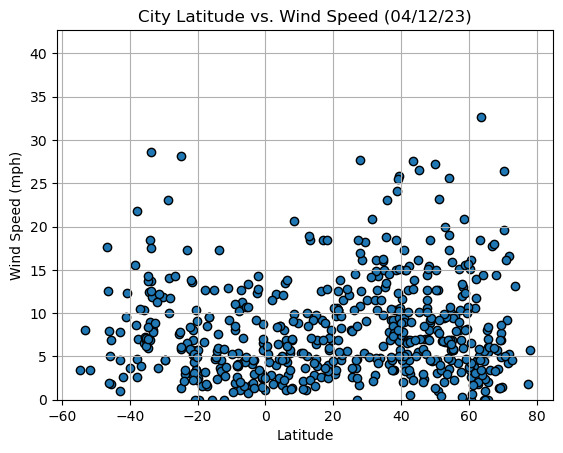

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/12/23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0, max(city_data_df["Wind Speed"])+10)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    plt.title(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,81.52,29,0,12.66,US,1681411386
2,kapaa,22.0752,-159.3190,77.09,83,75,13.80,US,1681411413
3,marystown,47.1666,-55.1483,45.86,100,69,7.00,CA,1681411413
5,qaanaaq,77.4840,-69.3632,10.27,84,5,1.77,GL,1681411413
6,anloga,5.7947,0.8973,83.19,81,32,13.47,GH,1681411413


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,61.18,89,14,13.76,ZA,1681411412
4,vaini,-21.2000,-175.2000,77.16,88,40,6.91,TO,1681411413
10,tautira,-17.7333,-149.1500,79.83,70,31,12.71,PF,1681411413
12,lae,-6.7221,146.9847,75.65,86,100,7.11,PG,1681411414
15,kaitangata,-46.2817,169.8464,58.93,73,98,12.57,NZ,1681411415


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.85


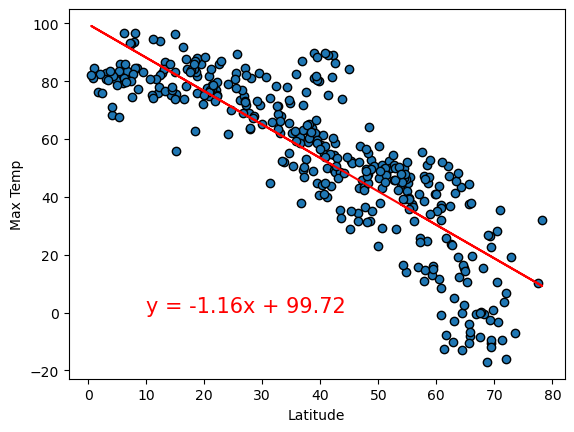

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(10,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.77


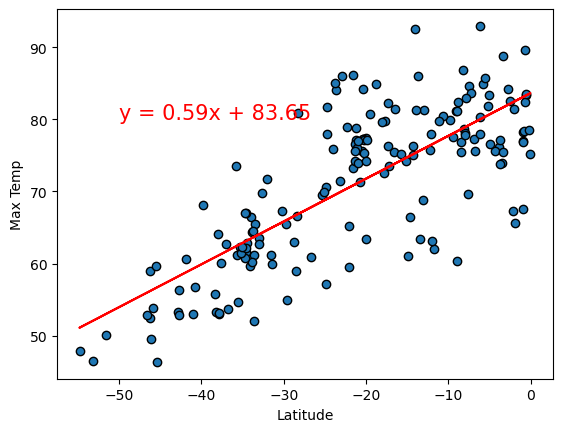

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** The linear regression above is modeling the relationship between latitude and maximum temperature in the northern and southern hemispheres. The analysis shows that there is a strong negative correlation between temperature and latitude in the northern hemisphere, and a strong positive correlation between temperature and latitude in the southern hemisphere. These results suggest that temperature and latitude are strongly related, with opposite trends in each hemisphere.

# Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.25


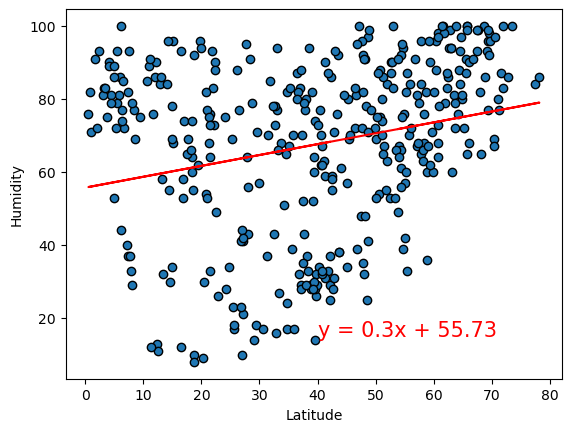

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(40,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.23


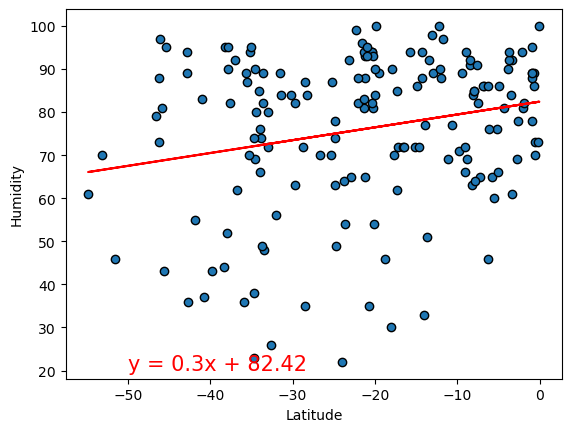

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** The linear regression is modeling the relationship between latitude and humidity, and how changes in latitude may affect humidity levels. The graphs show that there is a weak connection between latitude and humidity, with more humidity at higher latitudes in both the northern and southern hemispheres. However, there are other things like how close a place is to water and the direction of the wind that can also affect how humid it is.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14


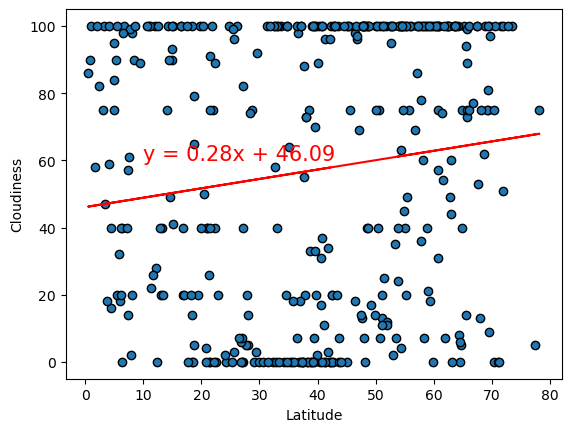

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(10,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.38


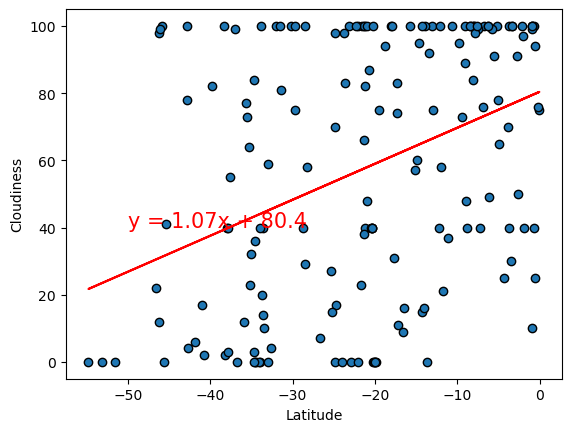

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** The linear regression is modeling the relationship between latitude and cloudiness, and how changes in latitude may affect cloud cover. The plots show that there is a slight increase in cloudiness with higher latitudes in the northern hemisphere, but a much stronger relationship in the southern hemisphere with significantly higher cloudiness observed at higher latitudes. However, it's important to note that other factors like wind patterns and proximity to water bodies can also affect cloud cover in a particular place.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05


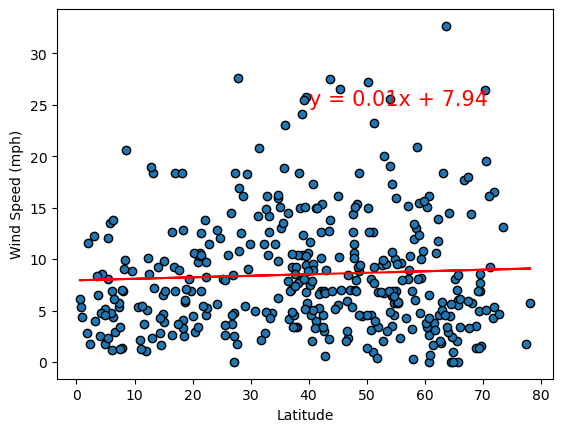

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

The r-value is: -0.25


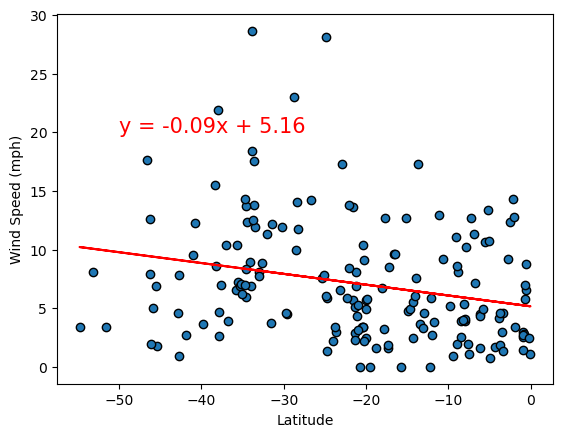

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

**Discussion about the linear relationship:** The linear regression is modeling the relationship between latitude and wind speed, and how changes in latitude may affect wind speeds. The plots indicate that in the northern hemisphere, there may be a slight increase in wind speed with higher latitudes, while in the southern hemisphere, there may be a slight decrease in wind speed with higher latitudes. However, other factors like the shape of the land and changes in temperature may also play a significant role in determining wind speed in a specific place.